# Part 1: Theory

Solving problems involving plasticity using conventional approaches necessitate the use of *internal* history variables which reside at the Gauss points of each finite element.
The existence of these history variables as integration point quantities can result in errors when projecting plastic histories, such as in the case of ALE meshing techniques.
To this end, a novel plasticity formulation,  referred to as *Multifield plasticity*, is developed with a flavour of a mixed formulation such that the plastic history variables instead reside at the nodes and are treated as an additional solution field.

## A summary of plasticity

Plasticity is defined as the irreversible deformation of a body undergoing a motion.
The process is illustrated in the one-dimensional stress-strain curve in [Figure 1](#fig_1), where $\sigma_1$ is the maximum principal stress and $\varepsilon_1$ is the maximum principal strain in the small-strain context.
The importance of the assumption of infinitesimal strains will be emphasised.
To account for the onset of plastic behaviour, both the kinematic description and the constitutive description of the material must be altered such that the state of the body depends on previous states of plastic deformation which the body has experienced.
To this end, *history* variables, sometimes referred to as hardening variables, such as the equivalent plastic strain $\bar{\varepsilon}_\text{p}$ are introduced which describe the plastic state of the material.

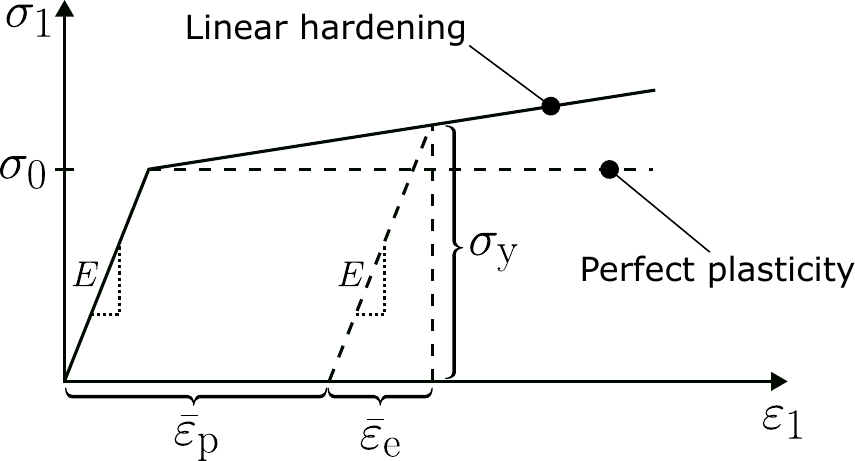


<a id='fig_1'></a> 
    <center><b>Fig. 1. Example of a typical principal stress-strain response at small strains.</b></center>

## A summary of computational plasticity

While the history of computational plasticity is vast, a brief summary will be provided here.
However, for a more thorough review of a classical approach to computational plasticity, see [[Simo, 2006]](#Simo_2006).

### Kinematics

Both small deformation and finite deformation descriptions are introduced.
Due to the choice of the Hencky strain as the deformation measure, the constitutive equations can be framed in an identical manner in the finite strain domain as in the small-strain context.

#### Finite strain plasticity

If a material experiencing a motion $\boldsymbol{\varphi} \left( \mathbf{X}, t \right)$ is assumed to undergo irreversible plastic deformation, the deformation gradient $\mathbf{F}$ can be multiplicatively decomposed into elastic $\mathbf{F}_\text{e}$ and plastic $\mathbf{F}_\text{p}$ parts
\begin{equation} \label{eqn:elastoplastic_decomp}
\mathbf{F} = \mathbf{F}_\text{e} \mathbf{F}_\text{p} .
\end{equation}

The notion of *displacement* $\mathbf{u}$ is introduced and is parameterised by
\begin{equation} \label{eqn:displacement_parameterisation}
  \mathbf{u} \left( \mathbf{X}, t \right) = \boldsymbol{\varphi} \left( \mathbf{X}, t \right) - \mathbf{X}.
\end{equation}
Similarly, the *velocity* $\mathbf{v}$ is defined as the rate of displacement given by
\begin{equation}
  \mathbf{v} \left( \mathbf{X}, t \right) = \frac{\partial \boldsymbol{\varphi} \left( \mathbf{X}, t \right)}{\partial t} ,
\end{equation}
since the material configuration $\mathbf{X}$ is assumed invariant with time.

The spatial velocity gradient defined as
\begin{equation}
\mathbf{l} = \frac{\partial \mathbf{v}}{\partial \mathbf{x}} = \nabla \mathbf{v},
\end{equation}
can be rewritten in terms of the elastic and plastic deformation gradients as
\begin{equation}
\mathbf{l} = \dot{\mathbf{F}}_\text{e} \mathbf{F}_\text{e}^{-1} + \mathbf{F}_\text{e} \dot{\mathbf{F}}_\text{p} \mathbf{F}_\text{p}^{-1} \mathbf{F}_\text{e}^{-1} = \mathbf{l}_\text{e} + \underbrace{\mathbf{F}_\text{e} \mathbf{L}_\text{p} \mathbf{F}_\text{e}^{-1}}_{\mathbf{l}_\text{p}}
\end{equation}
to define the elastic and plastic velocity gradients as
\begin{equation}
\mathbf{l}_\text{e} = \dot{\mathbf{F}}_\text{e} \mathbf{F}_\text{e}^{-1}
\end{equation}
and
\begin{equation}
\mathbf{L}_\text{p} = \dot{\mathbf{F}}_\text{p} \mathbf{F}_\text{p}^{-1},
\end{equation}
since the plastic velocity gradient $\mathbf{L}_\text{p}$ is defined in the stress-free configuration.

From the polar decomposition of $\mathbf{F}$ according to
\begin{equation}
\mathbf{F} = \mathbf{R} \mathbf{U} = \mathbf{V} \mathbf{R},
\end{equation}
the rigid body rotation $\mathbf{R}$ can be accounted for in either the elastic or plastic parts of the deformation gradient (4).
According to the additive decomposition of the velocity gradient into symmetric and skew parts given as
\begin{equation}
\mathbf{l} = \text{sym} \left(\mathbf{l}\right) + \text{skew} \left(\mathbf{l}\right) = \mathbf{d} + \mathbf{w} ,
\end{equation}
the same can be carried out for the respective elastic and plastic velocity gradients such that
\begin{equation}
\mathbf{l}_\text{e} = \mathbf{d}_\text{e} + \mathbf{d}_\text{e}
\end{equation}
and
\begin{equation}
\mathbf{L}_\text{p} = \mathbf{D}_\text{p} + \mathbf{W}_\text{p} .
\end{equation}
Assuming that all rotations are accounted for in the elastic deformation gradient $\mathbf{F}_\text{e}$ such that the plastic spin is negligible ($\mathbf{W}_\text{p} = \mathbf{0}$), leads to the additive decomposition of the total rate of deformation [[Aravas, 1991]](#Aravas_1991) as
\begin{equation} \label{eqn:total_rate_of_deformation}
\mathbf{d} = \mathbf{d}_\text{e} + {\mathbf{R}_\text{e}} \mathbf{D}_\text{p} \mathbf{R}_\text{e}^\top .
\end{equation}

Expressing the motion $\boldsymbol{\varphi}$ in terms of the displacement $\mathbf{u}$ \eqref{eqn:displacement_parameterisation} allows the deformation gradient to be rewritten in terms of the material displacement gradient, given by
\begin{equation}
  \mathbf{F} = \frac{\partial \mathbf{u}}{\partial \mathbf{X}} + \mathbf{I} .
\end{equation}
The material gradient of the displacement can then be used to define *strain* measures.
The *Green-Lagrangian* strain is given by
\begin{equation} \label{eqn:Green-Lagrange_strain}
\mathbf{E} = \frac{1}{2} \left[ \frac{\partial \mathbf{u}}{\partial \mathbf{X}} + \left[ \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right]^\top + \left[ \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right]^\top \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right] = \text{sym} \left( \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right) + \frac{1}{2} \left[ \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right]^\top \frac{\partial \mathbf{u}}{\partial \mathbf{X}}
\end{equation}
and is defined with respect to the material configuration.

#### The simplifying assumption of small strains

In the limit of small deformations, higher-order terms of the Green-Lagrangian strain can be neglected resulting in the linearised small strain tensor given by
\begin{equation}
\boldsymbol{\varepsilon} = \frac{1}{2} \left[ \frac{\partial \mathbf{u}}{\partial \mathbf{X}} + \left[ \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right]^\top \right] = \text{sym} \left( \frac{\partial \mathbf{u}}{\partial \mathbf{X}} \right) .
\end{equation}

Should the deformation remain small, only the symmetric part of the displacement gradient contributes to the deformation, implying that finite rotations are negligible.
As a consequence of Equation \ref{eqn:total_rate_of_deformation}, Equation \ref{eqn:Green-Lagrange_strain} simply becomes
\begin{equation}
\mathbf{d} = \mathbf{d}_\text{e} + \mathbf{d}_\text{p}.
\end{equation}
As a consequence, for bodies undergoing infinitesimal displacements, the assumption of the additive decomposition of the linearised strain holds such that the elastic strain is defined as 
\begin{equation}
\boldsymbol{\varepsilon}_\text{e} = \boldsymbol{\varepsilon} - \boldsymbol{\varepsilon}_\text{p} .
\end{equation}

### The use of the Hencky strain

Following [[Simo, 1992]](#Simo_1992) by assuming a time-discrete exponential mapping of the plastic deformation gradient, one finds that the Hencky strain is a suitable descriptor of the deformation such that the classical return-mapping algorithms can be applied in the finite strain regime. 
The Hencky strain is defined as
\begin{equation}
\mathbf{H} := \frac{1}{2} \ln \left( \mathbf{C} \right),
\end{equation}
where $\mathbf{C}$ is the right Cauchy-Green tensor, defined as
\begin{equation}
\mathbf{C} := \mathbf{F}^\top \mathbf{F} = \mathbf{U}^2
\end{equation}
and can be spectrally decomposed according to
\begin{equation} \label{eqn:spectral_decomp_C}
\mathbf{C} = \sum_{i=1}^3 \lambda_i^2 \mathbf{N}_i \otimes \mathbf{N}_i ,
\end{equation}
where $\lambda_i$ and $\mathbf{N}_i$ are the principal stretches and eigenvectors in the material configuration, respectively.
As a consequence of Equation \ref{eqn:spectral_decomp_C}, the Hencky strain can then also be spectrally decomposed according to
\begin{equation}
\mathbf{H} = \sum_{i=1}^3 \ln \left( \lambda_i \right) \mathbf{N}_i \otimes \mathbf{N}_i .
\end{equation}

In the context of a plastically deforming body which experiences a multiplicative decomposition of the total deformation gradient \eqref{eqn:elastoplastic_decomp}, on a account of the logarithmic nature of the Hencky strain, the total strain decomposition remains additive even under finite deformations, according to
\begin{equation}
\mathbf{H}_\text{e} = \mathbf{H} - \mathbf{H}_\text{p},
\end{equation}
where plastic incompressibility follows as
\begin{equation}
\text{tr} \left( \mathbf{H}_\text{p} \right) = 0 .
\end{equation}

### Kinetics

Due to power equivalency arguments between the First Piola-Kirchhoff stress $\mathbf{P}$ and the Second Piola-Kirchhoff stress $\mathbf{S}$, a corresponding new stress tensor, the *Hencky stress*, can also be defined as a result of
\begin{equation}
\mathbf{P} : \dot{\mathbf{F}} = \frac{1}{2} \mathbf{S} : \dot{\mathbf{C}} = \mathbf{T} : \mathbf{H}.
\end{equation}
The Hencky stress $\mathbf{T}$ is thus related to $\mathbf{P}$ and $\mathbf{S}$ by
\begin{equation} \label{eqn:P_T_conversion}
\mathbf{P} = \mathbf{T} : \mathbb{P} \quad \text{with} \quad \mathbb{P} = \frac{\partial \mathbf{H}}{\partial \mathbf{F}}
\end{equation}
and
\begin{equation} \label{eqn:S_T_conversion}
\mathbf{S} = \mathbf{T} : \mathbb{P}_\text{L} \quad \text{with} \quad \mathbb{P}_\text{L} = 2 \frac{\partial \mathbf{H}}{\partial \mathbf{C}},
\end{equation}
respectively.

Even the problem of rate-independent plasticity is time-dependent, necessitating an incremental solution procedure.
Should the material be loaded above the initial yield stress of $\sigma_0$, as shown in [Figure 1](#fig_1), plasticity occurs.
The range of elastic behaviour is described by a scalar yield function where
\begin{equation}
f \left( \mathbf{\sigma}, \theta_i \right)
\begin{cases}
  < 0 \quad \text{for an elastic stress state},\\
  = 0 \quad \text{for a plastic stress state},
\end{cases}
\end{equation}
where the case of $f = 0$ defines the *yield surface*.
The yield function depends on the current state of stress $\boldsymbol{\sigma}$ and hardening variables $\theta_i$.
Hardening variables, also referred to as internal, hidden, and state variables, are used to describe the state of plastic deformation of the body.

The deformation is defined to be elastic when $f < 0$ and inelastic when $f = 0$.
In the case that $f < 0$, an elastic description of the material fully defines the behaviour.
However, should plastic deformation occur, it is necessary to alter the constitutive material response.
After plastic flow is initiated at $\sigma_\text{y}$, the effects are incorporated into the subsequent material behaviour.
An associative flow rule is defined as where the direction of plastic flow coincides with the direction of the outward normal of the yield surface.
When using the Hencky model for finite strains, the plastic rate of deformation can be defined as
\begin{equation} \label{eqn:flow_relation}
\dot{\mathbf{H}}_\text{p} = \dot{\tau} \frac{\partial f}{\partial \mathbf{T}},
\end{equation}
where $\dot{\tau}$ is the plastic multiplier.

Finally, the enforcement of the "on/off" behaviour, complete with the irreversible nature of plastic deformation, is encapsulated by the Karush-Kuhn-Tucker (KKT) conditions [[Simo, 2006]](#Simo_2006), given by
\begin{align} \label{eqn:kkt_condition}
f \leq 0, && \dot{\tau} \geq 0, && f \dot{\tau} = 0.
\end{align}
Conventionally, the plastic multiplier is evaluated according to the integration of the constitutive equation which defines the hardening behaviour of the material by implementing a *return-mapping algorithm* [[Simo, 2006]](#Simo_2006), [[Dunne, 2005]](#Dunne_2005).

As of yet, the form of the yield function $f$ has not been provided.
However, it often takes the general form of
\begin{equation} \label{eqn:flow_rule}
f = \lVert \mathbf{T} + \boldsymbol{\chi} \rVert_\text{dev} - \sigma_\text{y} \leq 0,
\end{equation}
where $\lVert \bullet \rVert_\text{dev}$ defines the norm of the deviatoric part of the stress, $\sigma_\text{y}$ is the current yield stress which accounts for *isotropic* hardening and $\boldsymbol{\chi}$ is the tensorial back stress which accounts for *kinematic* hardening.
For a given yield surface, as illustrated in [Figure 2(a)](#fig_2a), isotropic hardening acts to expand the yield surface.
However, in the case of kinematic hardening, the back stress tensor $\boldsymbol{\chi}$ acts to translate the yield surface, which would decrease the observed yield stress in compression, as seen in [Figure 2(b)](#fig_2b), leading to the material exhibiting the Bauschinger effect [[Simo, 2006]](#Simo_2006), [[Dunne, 2005]](#Dunne_2005).

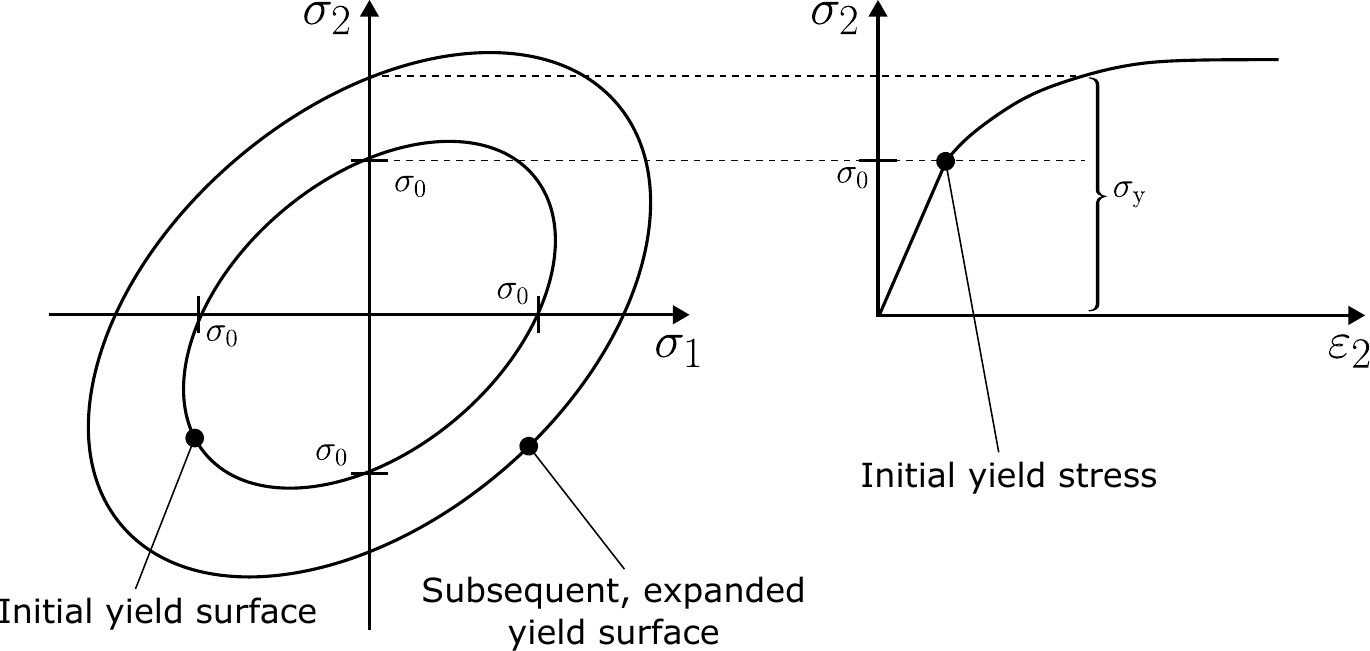
<a id='fig_2a'></a> 
    <center><b>a) Isotropic hardening.</b></center>

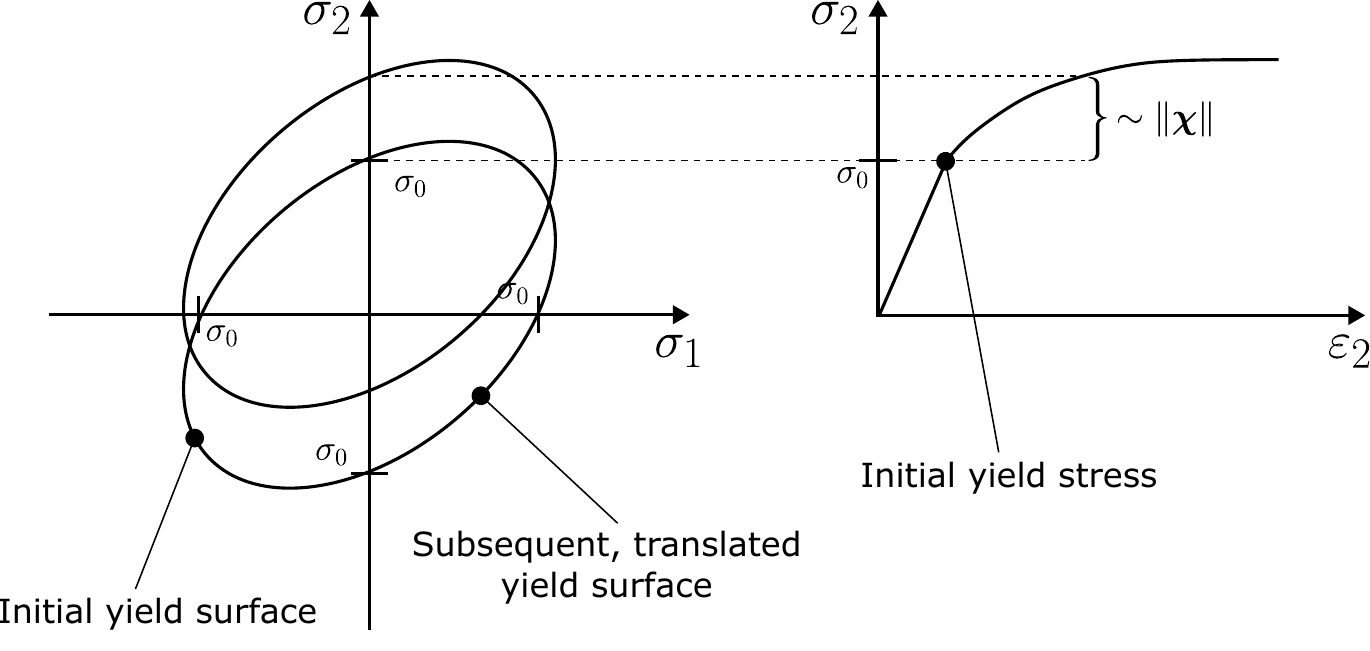
<a id='fig_2b'></a> 
    <center><b>b) Kinematic hardening.</b></center>
    
<a id='fig_2'></a> 
    <center><b>Fig. 2. Illustration of the effect of plastic hardening on the yield surface in principal
stress space</b></center>

### Constitutive and flow relations

To solve the elastoplastic problem, both the elastic and the plastic behaviour must be defined.
The evolution of isotropic and kinematic hardening are described via hardening relations.
Typically, both the isotropic and kinematic hardening depend upon the equivalent plastic strain where
\begin{equation}
\dot{\bar{{}\varepsilon}}_\text{p} = \dot{\tau} \implies \bar{\varepsilon}_\text{p} = \int_\mathcal{T} \dot{\tau} \ \text{d} t .
\end{equation}

#### Elasticity

In most plastically-deforming media, the elastic deformation conforms to Hooke's law, such that the elastic behaviour is defined as
\begin{equation}
\mathbf{T} = \mathbb{D} : \mathbf{H}_\text{e} .
\end{equation}
As the Hencky stress $\mathbf{T}$ can be related to both the first and second Piola-Kirchhoff stresses by Equations \ref{eqn:P_T_conversion} and \ref{eqn:S_T_conversion}, conventional finite deformation stress measures can be recovered.

#### Isotropic hardening

Isotropic hardening in the flow rule \eqref{eqn:flow_rule} is defined according to [[Miehe, 2002]](#Miehe_2002) as
\begin{equation}
\sigma_\text{y} = H \tau + Q_\infty \left( 1 + \exp \left( - b_\text{iso} \tau \right) \right) + \sigma_0 .
\end{equation}

#### Kinematic hardening

Kinematic hardening of the form
\begin{equation}
\dot{\mathbf{\chi}} = C_1 \dot{\mathbf{H}}_\text{p}
\end{equation}
is implemented.

## Conservation of linear momentum

The conservation of linear momentum is briefly introduced for completeness.
The problem definition includes a conservation law
\begin{equation} \label{eqn:linear_momentum_cons}
\text{Div} \left( \mathbf{P} \right) + \mathbf{b} = \mathbf{0} \quad \text{in} \ \Omega
\end{equation}
complete with boundary conditions given as
\begin{equation}
\mathbf{u} = \bar{\mathbf{u}} \quad \text{on} \ \Gamma_{\mathbf{u}}
\end{equation}
and
\begin{equation}
\mathbf{P} \cdot \mathbf{N} = \bar{{}\mathbf{t}} \quad \text{on} \ \Gamma_{\mathbf{t}}.
\end{equation}
For this particular problem, the body force is taken to be $\mathbf{b} = \mathbf{0}$.

## Multifield plasticity for finite deformations

Until this point, the discussion has been limited to the conventional treatment of computational plasticity.
Now, a mixed formulation of plasticity is introduced, namely *Multifield* plasticity, to ensure that the plastic strains exist as degrees of freedom in the problem with the corresponding fields $\tau \in L^2$ and $\mathbf{H}_\text{p} \in \left[ L^2 \right]^{3 \times 3}$.
It should be noted that by approximating the plastic fields in $L^2$ ensures that the trace of the plastic strain disappears on the boundary, negating the requirement of suitable boundary conditions for this field (similar to how the natural boundary conditions become essential and vice versa as seen until now).
Furthermore, specific benefits arise when considering such applications as ALE meshing, in which the projection of plastic history remains an open question.

To formulate the problem in a variational framework, in addition to the conservation of linear momentum \eqref{eqn:linear_momentum_cons} with a corresponding weak form of
\begin{equation}
\int_\Omega \delta \mathbf{F} : \mathbf{P} \ \text{d} V - \int_{\Gamma_{\mathbf{t}}} \delta \mathbf{u} \cdot \bar{{}\mathbf{t}} \ \text{d} A = 0 \quad \forall \delta \mathbf{u} \in \left[ H_0^1 \right]^3 ,
\end{equation}
an additional equation is sought for the plastic multiplier field $\dot{\tau}$.
The KKT conditions \eqref{eqn:kkt_condition} are realised via a Fischer-Burmeister complementarity function [[Lewandowski, 2023]](#Lewandowski_2023) of the form
\begin{equation} \label{eqn:c_function}
c \left( \dot{\tau}, f \right) = c_\tau - f - \lvert| c_\tau \dot{\tau} + f \rvert = 0.
\end{equation}
where $c_\tau$ is a stability parameter.
Equation \ref{eqn:c_function} is then used as the governing equation for the newly introduced plastic multiplier field, with the weak form following as
\begin{equation}
\int_\Omega \delta \tau \left[ c_\tau \dot{\tau} - f - \lvert c_\tau \dot{\tau} + f \rvert \right] \ \text{d} V = 0 \quad \forall \delta \tau \in L^2 .
\end{equation}
The resulting value of $\dot{\tau}$ is then used to inform $\dot{\mathbf{H}}_\text{p}$ according to the flow relation \eqref{eqn:flow_relation}.

Finally, a consistency condition is required coupling the resulting plastic strains $\mathbf{H}_\text{p}$ and the plastic multiplier results in the constraint
\begin{equation}
\dot{\mathbf{H}}_\text{p} - \dot{\tau} \frac{\partial f}{\partial \mathbf{T}} = 0 
\end{equation}
with a corresponding weak form of
\begin{equation}
\int_\Omega \delta \mathbf{H}_\text{p} : \mathbb{D} : \left[ \dot{\mathbf{H}}_\text{p} - \dot{\tau} \frac{\partial f}{\partial \mathbf{T}} \right] \ \text{d} V = 0 \quad \forall \delta \mathbf{H}_\text{p} \in \left[ L^2 \right]^{3 \times 3}.
\end{equation}

By introducing the plastic multiplier field with additional degrees of freedom, the need for conventional return-mapping algorithm with the associated internal variables at Gauss points is negated.

### References:

<a id='Simo_2006'></a> 
**[Simo, 2006]** J. C. Simo and T. J. R. Hughes. Computational Inelasticity, volume 7. Springer Science & Business Media, 2006.

<a id='Aravas_1991'></a> 
**[Aravas, 1991]** N. Aravas and E. C. Aifantis. On the geometry of slip and spin in finite plastic deformation. International Journal of Plasticity, 7(3):141–160, 1991.

<a id='Simo_1992'></a> 
**[Simo, 1992]** J. C. Simo. Algorithms for static dynamic multiplicative plasticity that preserve the classical return mapping schemes of the infinitesimal theory. Computer Methods in Applied Mechanics and Engineering, 99(1):61–112, 1992.

<a id='Dunne_2005'></a> 
**[Dunne, 2005]** F. Dunne and N. Petrinic. Introduction to Computational Plasticity. Oxford University Press, Oxford, 2005.

<a id='Miehe_2002'></a> 
**[Miehe, 2002]** C. Miehe, N. Apel, and M. Lambrecht. Anisotropic Additive Plasticity in the Logarithmic Strain Space: Modular Kinematic Formulation and Implementation Based on Incremental Minimization Principles for Standard Materials. Computer Methods in Applied Mechanics and Engineering 191 (47–48): 5383–5425, 2002.

<a id='Lewandowski_2023'></a>
**[Lewandowski, 2023]** K. Lewandowski, D. Barbera, P. Blackwell, A. H. Roohi, I. Athanasiadis, A. McBride, P. Steinmann, C. Pearce, and Ł. Kaczmarczyk. Multifield finite strain plasticity: Theory and numerics. Computer Methods in Applied Mechanics and Engineering 414: 116101, 2023.

# Part 2: Example - Necking of a bar under uniaxial loading

The accompanying code detailing the implementation can be found in [ADV-0](http://mofem.eng.gla.ac.uk/mofem/html/tutorial_plastic_problem.html).

A bar is loaded by a prescribed displacement of $7 \text{mm}$ at one end.
Symmetry of the problem is exploited such that one eighth of the bar is modelled, as seen in [Figure 3](#fig_3), reducing the problem size.
On each face where symmetry is invoked, the normal displacements are constrained, while the displacements tangential to the surface are free.

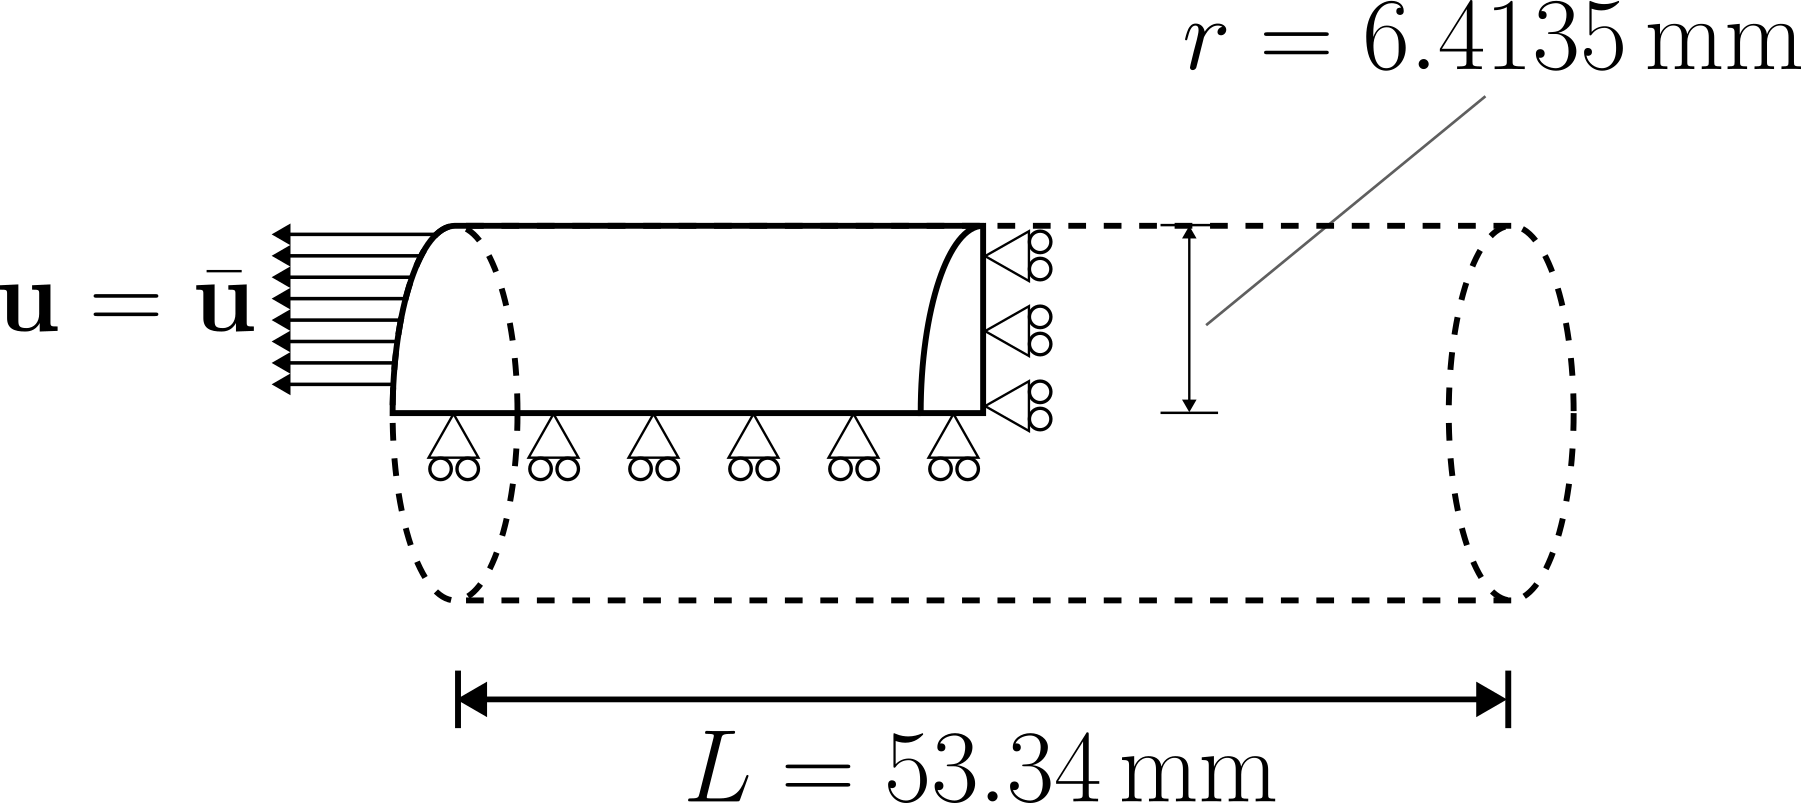
<a id='fig_3'></a> 
    <center><b>Fig. 3. Cylinder geometry indicating planes of symmetry and prescribed displacement.</b></center>

In this instance, a Cubit mesh file is provided defining the necessary boundary conditions on the geometry.
Further details of the benchmark problem set-up can be found in [[Miehe, 2002]](#Miehe_2002).

Investigate the effects of hardening parameters, approximation order, and the assumptions of small/finite deformations on the force-displacement response.

### References:

<a id='Miehe_2002'></a> 
**[Miehe, 2002]** C. Miehe, N. Apel, and M. Lambrecht. Anisotropic Additive Plasticity in the Logarithmic Strain Space: Modular Kinematic Formulation and Implementation Based on Incremental Minimization Principles for Standard Materials. Computer Methods in Applied Mechanics and Engineering 191 (47–48): 5383–5425, 2002.

### Importing necessary modules, setting parameters, and paths

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy import optimize
import time
import os
import os.path
import zipfile
import pandas as pd
from scipy.optimize import curve_fit, least_squares
import sys
import gmsh
import math

import matplotlib.image as mpimg
import re

import pyvista as pv
import ipywidgets as widgets
from IPython.display import display, Image
pv.set_plot_theme("document")

plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = "Serif"
plt.rcParams['font.size'] = 20

from pyvirtualdisplay import Display
display = Display(backend="xvfb", visible=False, size=(1024, 768))
display.start()
    
user_name=!whoami # get user name
user_name=user_name[0]
um_view = "/mofem_install/jupyter/%s/um_view" % user_name

### Define utility functions (running the analysis, results post-processing)

In [ ]:
class AttrDict(dict):
    def __getattr__(self, attr):
        if attr in self:
            return self[attr]
        raise AttributeError(f"'AttrDict' object has no attribute '{attr}'")

def parse_log_file(params):
    res = AttrDict()
    with open("log", "r") as log_file:
        for line in log_file:
            line = line.strip()
            if "nb global dofs" in line:
                res.elem_num = int(line.split()[13])
            if "error L2 norm" in line:
                res.err_l2_norm = float(line.split()[7])
            if "error H1 seminorm" in line:
                res.err_h1_snorm = float(line.split()[7])
            if "error indicator" in line:
                res.err_indic_tot = float(line.split()[6])
    return res

def generate_disp_time_history(params):
    # Open the file for writing
    with open(params.bc_time_history+".txt", 'w') as f:
        # Use a for loop to write each line of data to the file
        # FORCE_1 boundary condition (change in params bellow)
        data = ['0 0', '%s 1' %params.ts_max_time]
        # Use a for loop to write each line of data to the file
        for line in data:
            f.write(line + '\n')
            # print the data as it is written to the file
            print(line)
            
def run_mofem(params):
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    
    !rm -rf {params.show_file}*
    !{um_view}/bin/mofem_part -my_file {params.mesh_file}".cub" -output_file {params.part_file} \
    -my_nparts {params.nproc}
    
    !export OMPI_MCA_btl_vader_single_copy_mechanism=none && \
    nice -n 10 mpirun --oversubscribe --allow-run-as-root \
    -np {params.nproc} {um_view}/tutorials/adv-0/{params.executable} \
    -file_name {params.part_file} -time_vector_file {params.bc_time_history}.txt \
    -young_modulus {params.young_modulus} \
    -poisson_ratio {params.poisson_ratio} \
    -yield_stress {params.yield_stress} \
    -hardening {params.hardening} \
    -Qinf {params.Qinf} -b_iso {params.b_iso} \
    -large_strains {params.large_strains} \
    -ts_dt {params.ts_dt} \
    -ts_max_time {params.ts_max_time} \
    -ts_type {params.ts_type} \
    -snes_linesearch_type {params.snes_linesearch_type} \
    -order {params.order} \
    -scale 1 \
    -cn {params.cn} 2>&1 | tee log
    
    !convert.py -np {params.nproc} out* err*

    return parse_log_file(params)

def show_results(params):
    # Get a list of all the vtk files
    out_to_vtk = !ls -c1 {params.show_file}_*vtk
    
    # Open pyvista
    p = pv.Plotter(notebook=True, off_screen=True, window_size=[1024, 384])
    
    # Position the camera
    p.camera.position = (0.0, -95.0, -10.0)
    p.camera.focal_point = (0.0, 0.0, -10.0)
    p.camera.up = (1.0, 0.0, 0.0)
    # p.camera.zoom(0)
    
    p.show_axes()
    
    # Get number of vtk files in directory
    length = len(out_to_vtk)
    
    #Extract elongation to offset mirror.
    !grep Uz 'log' > uz
        
    data_uz=pd.read_csv('uz',sep='\s+',header=None)
    data_uz=data_uz.drop([0,1,2,3,4,5,6,8,9], axis=1)
    data_uz=data_uz.rename(columns={7: "max"})
    
    data_uz['elongation'] = data_uz['max'].to_numpy()

    # If we make a gif, initialise one. If not, we only loop over the last index.
    if params.gif:
        
        gif_name = params.show_file+"_animation.gif"

        # Open a gif
        p.open_gif(gif_name)
        
        start = 0
    else:
        start = length-1
        
    # Loop over all vtk files
    for i in range(start,length):
        # Read each file
        mesh = pv.read("out_skin_plastic_"+"%s"%i+".vtk")
        if params.show_edges:
            mesh=mesh.shrink(0.95)
        
        jupyter_backend='panel'
        cmap = "turbo"
        if params.show_file == "out":
            jupyter_backend='ipygany'
            if mesh.point_data[params.show_field].ndim > 1:
                cmap = "viridis"
        
        # Warp the mesh
        mesh=mesh.warp_by_vector(vectors="U", factor=1.0)

        # Add the original mesh
        p.add_mesh(mesh, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap, clim=params.clim)

        # Check if we should mirror the mesh
        if params.mirror:
            mesh_mirrored_x = mesh.reflect((1, 0, 0), point=(0, 0, data_uz['elongation'][i]))
            mesh_mirrored_y = mesh.reflect((0, 1, 0), point=(0, 0, data_uz['elongation'][i]))
            mesh_mirrored_xy = mesh_mirrored_x.reflect((0, 1, 0), point=(0, 0, data_uz['elongation'][i]))
            mesh_mirrored_z = mesh.reflect((0, 0, 1), point=(0, 0, data_uz['elongation'][i]))
            mesh_mirrored_xz = mesh_mirrored_x.reflect((0, 0, 1), point=(0, 0, data_uz['elongation'][i]))
            mesh_mirrored_yz = mesh_mirrored_y.reflect((0, 0, 1), point=(0, 0, data_uz['elongation'][i]))
            mesh_mirrored_xyz = mesh_mirrored_xy.reflect((0, 0, 1), point=(0, 0, data_uz['elongation'][i]))
            p.add_mesh(mesh_mirrored_x, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap)
            p.add_mesh(mesh_mirrored_y, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap)
            p.add_mesh(mesh_mirrored_xy, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap)
            p.add_mesh(mesh_mirrored_z, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap)
            p.add_mesh(mesh_mirrored_xz, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap)
            p.add_mesh(mesh_mirrored_yz, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap)
            p.add_mesh(mesh_mirrored_xyz, scalars=params.show_field, component=None, smooth_shading=True, cmap=cmap)
        
        if params.gif:
            # Write a frame. This triggers a render
            p.write_frame()
            # Clear all the meshes from the scene
            p.clear()
                

    if params.gif:
        # Closes and finalizes frame
        p.close()
        # Show gif
        from IPython.display import display, Image
        display(Image(filename=gif_name))
    else:
        p.show(jupyter_backend=jupyter_backend)
    
def show_field(params):
    params.show_file = "out"
    show_results(params)

    return
    
def show_error(params):
    params.show_file = "error"
    show_results(params)

    return

def get_data_from_string(data_string, columns = 2, delimiter=' '):
        my_data=np.fromstring(data_string, dtype=float, sep=delimiter)
        my_data = my_data.reshape(int(my_data.size/columns),columns)
        return my_data

def extractFu(params):
    # Extract relevant data from log file and save into other files
    !awk '/SimpleProblem_U_FIX_Z1/ { b = 1 }; /Force/ { if(b) { print $0; b=0; } }' log > reaction
    !grep Ux 'log' > ux
    !grep Uy 'log' > uy
    !grep Uz 'log' > uz
    
    # Format data from Miehe paper
    miehe_force="0 0 0.1449 56.66 0.618 60.717 1.304 65.50 2.33 70.35 3.304 73.52 3.9613 74.9 4.7729 76.02 5.381 76.61 5.922 76.83 6.927 76.09 7.429 74.9 7.9516 73.15 8.763 69.54 9.429 65.79 10.019 61.96 10.444 59.09 10.927 55.78 11.256 53.505 11.574 51.14 12.193 46.95 12.531 44.59 12.859 42.46 13.536 38.417 13.874 36.65"
    miehe_force=get_data_from_string(miehe_force)
    data_miehe=pd.DataFrame(miehe_force)
    data_miehe=data_miehe.rename(columns={0: "displacement", 1: "force"})
    
    # Extract the reaction force and displacements in the correct direction
    data_reaction=pd.read_csv('reaction',sep='\s+',header=None)
    data_uz=pd.read_csv('uz',sep='\s+',header=None)

    data_reaction=data_reaction.drop([0,1,2,3,4,5], axis=1)
    data_reaction=data_reaction.rename(columns={6: "force"})
    data_uz=data_uz.drop([0,1,2,3,4,5,6,8], axis=1)
    data_uz=data_uz.rename(columns={7: "max"})

    plt.rcParams['figure.figsize'] = [15, 10]

    # Reaction force acts on only one quarter of the total area
    data_reaction['force']=-4.*data_reaction['force'].to_numpy()/1000.0
    # Similarly there is twice as much deformation, on account of symmetry
    data_uz['elongation']=-2.*data_uz['max'].to_numpy()

    # Plot data
    fig, ax = plt.subplots()
    ax.plot(data_uz['elongation'].to_numpy(), 
            data_reaction['force'].to_numpy()[1:], 'ro-', label='multifield plasticity (MoFEM)')
    ax.plot(data_miehe['displacement'].to_numpy(), 
            data_miehe['force'].to_numpy(), 'b-', label='classical computational plasticity (Miehe paper)')
    ax.set(xlabel='u [mm]', ylabel='force [kN]',
           title='Load displacement path')
    #Set limit to fit Miehe paper
    ax.axis(xmin=0)
    ax.legend(loc='best')
    ax.grid(True)

### Dictionary defining all relevant parameters for solving the problem

In [ ]:
params = AttrDict() # Attribute dictionary for storing the parameters

# Pre-processing parameters
params.mesh_file = "necking_test" # No file extension needed
params.bc_time_history = "disp_time" # File used to define time history of boundary conditions. No file extension needed

# Constitutive model parameters
bulk_modulus = 164.206e3 # Pa
shear_modulus = 80.1938e3 # Pa
params.poisson_ratio = (3.*bulk_modulus-2.*shear_modulus)/(2.*shear_modulus+6.*bulk_modulus) # MPa
params.young_modulus = 2.*shear_modulus*(1.+params.poisson_ratio) # MPa
params.yield_stress = 0.45e3 # MPa
params.hardening = 0.12924e3 # MPa
params.Qinf = 265 # MPa
params.b_iso = 16.93
params.cn = 1 # Stability parameter

# Solution parameters
params.executable = "plastic_3d" # Executable name
params.nproc = 4 # Number of processors
params.ts_dt = 0.015 # Time step size
params.ts_max_time = 1.0 # End time of simulation
params.ts_type = "theta" # Time integration scheme
params.snes_linesearch_type = "l2" 
params.order = 2 # Approximation order
params.large_strains = 1 # 1 - large strains, 0 - small strains

# Post-processing parameters
params.show_file = "out" # Output file name. No extension needed.

### Run the analysis

In [ ]:
run_mofem(params)

### Post-process results

In [ ]:
params.show_field = "PLASTIC_STRAIN" # PLASTIC_STRAIN, PLASTIC_MULTIPLIER, FIRST_PIOLA, GRAD, U
params.show_edges = False # True - show element edges, False - do not show edges
params.mirror = True # True - show mirrored mesh, False - show original mesh
params.gif = False # True - generate gif, False - show last timestep
params.clim = [0,2.] # Colorbar limits [min, max]

# Generate contour plot at final timestep or animation for all timesteps
show_field(params)

In [ ]:
# Plot load-disp curve
extractFu(params)